In [1]:
from QCircuit import *
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm
from scipy import constants
%matplotlib inline
from numpy import *

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.ticker

import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
import numpy

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle

import numpy as np

In [3]:
C_big = 600e-15
constants.elementary_charge**2/C_big/2/constants.Planck/1e9

0.03228371554508585

In [6]:
Ec = 500e6              
C_big = 600e-15
E_Big = constants.elementary_charge**2/C_big/2/constants.Planck      
E_Big/1e6

32.28371554508585

# 3 loops Kitaev mirror

In [22]:
FQJJ = QCircuit()
FQJJ.add_element(QJosephsonJunction('JJA'), ['GND', '1'])
FQJJ.add_element(QJosephsonJunction('JJB'), ['1', '2'])
FQJJ.add_element(QJosephsonJunction('JJC'), ['2', '3'])
FQJJ.add_element(QJosephsonJunction('JJD'), ['3', '4'])
FQJJ.add_element(QJosephsonJunction('JJE'), ['4', '5'])
FQJJ.add_element(QJosephsonJunction('JJF'), ['5', '6'])
#FQJJ.add_element(QJosephsonJunction('JJF'), ['6', 'GND'])

FQJJ.add_element(QCapacitance('CA'), ['GND', '1'])
FQJJ.add_element(QCapacitance('CB'), ['1', '2'])
FQJJ.add_element(QCapacitance('CC'), ['2', '3'])
FQJJ.add_element(QCapacitance('CD'), ['3', '4'])
FQJJ.add_element(QCapacitance('CE'), ['4', '5'])
FQJJ.add_element(QCapacitance('CF'), ['5', '6'])
#FQJJ.add_element(QCapacitance('CF'), ['6', 'GND'])


#FQJJ.add_element(QCapacitance('CBig1'), ['1', '4'])
FQJJ.add_element(QCapacitance('CBig2'), ['1', '4'])
FQJJ.add_element(QCapacitance('CBig3'), ['2', '5'])

FQJJ.add_element(QCapacitance('Ctune'), ['6', 'GND'])
        
phi1 = QVariable('φ1')
phi2 = QVariable('φ2')
phi3 = QVariable('φ3')
phi4 = QVariable('φ4')
phi5 = QVariable('φ5')
#phie = QVariable('φe')


phi1.create_grid(10, 1)
phi2.create_grid(10, 1)
phi3.create_grid(10, 1)
phi4.create_grid(10, 1)
phi5.create_grid(10, 1)
#phie.create_grid(10, 1)

FQJJ.add_variable(phi1)
FQJJ.add_variable(phi2)
FQJJ.add_variable(phi3)
FQJJ.add_variable(phi4)
FQJJ.add_variable(phi5)
FQJJ.add_variable(phie)

#FQJJ.map_nodes_linear(['GND', '1', '2', '3', '4', '5', '6'], 
#                      ['φe', 'φ1', 'φ2', 'φ3', 'φ4', 'φ5'], 
#                      np.asarray([[0,0,0,0,0,0], [1,0,0,0,0,0],  [1,1,0,0,0,0], [1,1,1,0,0,0], [1,1,1,1,0,0],  
#                                   [1,1,1,1,1,0], [1,1,1,1,1,1]]))
        
FQJJ.map_nodes_linear(['GND', '1', '2', '3', '4', '5'], 
                      ['φ1', 'φ2', 'φ3', 'φ4', 'φ5', 'φ6'], 
                      np.asarray([[0,0,0,0,0,0], [1,0,0,0,0,0], [1,1,0,0,0,0], [1,1,1,0,0,0],  
                                   [1,1,1,1,0,0], [1,1,1,1,1,0]]))


alpha_steps = 100
energies = np.zeros((alpha_steps,4), dtype=np.float)
#flux_steps = 100
#energies = np.zeros((flux_steps,4), dtype=np.float)

Ej = 200e9                 
Ec = 500e6              
C_big = 600e-15
E_Big = constants.elementary_charge**2/C_big/2/constants.Planck           

FQJJ.find_element('JJA').set_critical_current(Ej)
FQJJ.find_element('JJB').set_critical_current(Ej)
FQJJ.find_element('JJC').set_critical_current(Ej)
FQJJ.find_element('JJD').set_critical_current(Ej)
FQJJ.find_element('JJE').set_critical_current(Ej)
FQJJ.find_element('JJF').set_critical_current(Ej)

FQJJ.find_element('CA').set_capacitance(2/Ec)
FQJJ.find_element('CB').set_capacitance(2/Ec)
FQJJ.find_element('CC').set_capacitance(2/Ec)
FQJJ.find_element('CD').set_capacitance(2/Ec)
FQJJ.find_element('CE').set_capacitance(2/Ec)
FQJJ.find_element('CF').set_capacitance(2/Ec)

#FQJJ.find_element('CBig1').set_capacitance(2/E_Big)
FQJJ.find_element('CBig2').set_capacitance(2/E_Big)
FQJJ.find_element('CBig3').set_capacitance(2/E_Big)


#phi_range = np.linspace(-2*np.pi, 0*np.pi, flux_steps)
alpha_range = np.linspace(1e6, 1000e6, alpha_steps)
for alpha_id, alpha_value in enumerate(alpha_range):
    FQJJ.find_element('Ctune').set_capacitance(2/alpha_value)
    FQJJ.calculate_potentials()
    [eigenenergies, eigenfunctions] = FQJJ.diagonalize_phase(num_states=4)
    energies[alpha_id, :] = eigenenergies
    print (alpha_id)

#for phie_id, phie_value in enumerate(phi_range):
    #phie.set_parameter(phie_value, 0)
    #FQJJ.calculate_potentials()
    #[eigenenergies, eigenfunctions] = FQJJ.diagonalize_phase(num_states=4)
    #energies[phie_id, :] = eigenenergies
    #print (phie_id)
    #print('φx1_id: {0}, φx2_id: {1}, gap: {2}'.format(phix1_id, phix2_id, eigenenergies[1]-eigenenergies[0]))

Exception: ('VariableError', 'Wrong number of nodes in node list. Got 6, expected 7')

In [ ]:
fig, axes = plt.subplots(figsize=(8, 8))

handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, labels)

for n in range(4):
    plt.plot(np.linspace(-2, 0, flux_steps), (energies[:,n])/1e9, linewidth=1.0,  label=r'$E_{%d}$'%n)

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102))

axes.set_xlabel(r'$\Phi/\Phi_0$', fontsize=24)
axes.set_ylabel(r'Frequency (GHz)', fontsize=24)

axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)

In [ ]:
fig, axes = plt.subplots(figsize=(8, 8))

handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, labels)

for n in range(3):
    plt.plot(np.linspace(-1, 0, flux_steps), (energies[:,n+1] - energies[:,n])/1e9, linewidth=2.0,  label=r'$f_{%d}$'%n)
    
#plt.plot(np.linspace(-2, 0, flux_steps), (energies[:,1]-energies[:,0])/1e9, 'b', linewidth=3.0, label='$f_{01}$')
#plt.plot(np.linspace(-2, 0, flux_steps), (energies[:,2]-energies[:,1])/1e9, 'r', linewidth=3.0, label='$f_{12}$')
#plt.plot(np.linspace(-2, 0, flux_steps), (energies[:,3]-energies[:,2])/1e9, 'g', linewidth=3.0, label='$f_{23}$')
#plt.plot(np.linspace(-2, 0, flux_steps), (energies[:,4]-energies[:,3])/1e9, 'c', linewidth=3.0, label='$f_{34}$')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102))

axes.set_xlabel(r'$\Phi/\Phi_0$', fontsize=24)
axes.set_ylabel(r'Frequency (GHz)', fontsize=24)

axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)

#axes.set_ylim((0, 3))

#plt.gcf().set_size_inches(12,12)
#plt.savefig("C:/neon/Cosmic/4 loops qubit additional capacitance alpha=1.pdf", bbox_inches="tight")

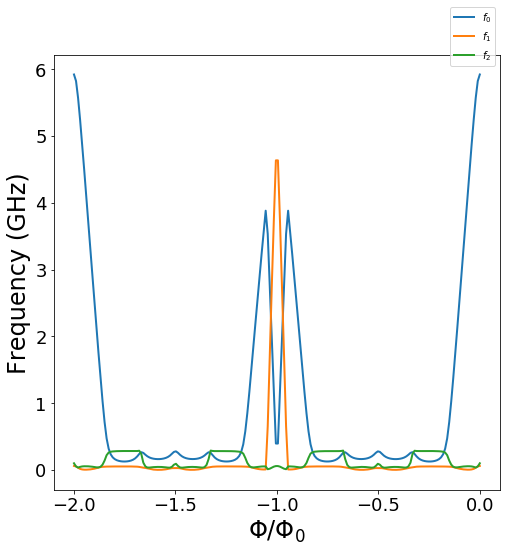

In [14]:
fig, axes = plt.subplots(figsize=(8, 8))

handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, labels)

for n in range(3):
    plt.plot(np.linspace(-2, 0, flux_steps), (energies[:,n+1] - energies[:,n])/1e9, linewidth=2.0,  label=r'$f_{%d}$'%n)
    
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102))

axes.set_xlabel(r'$\Phi/\Phi_0$', fontsize=24)
axes.set_ylabel(r'Frequency (GHz)', fontsize=24)

axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)

4 JJ loop tunable alpha

In [178]:
FQJJ = QCircuit()
FQJJ.add_element(QJosephsonJunction('JJA'), ['1', '3'])
FQJJ.add_element(QJosephsonJunction('JJB'), ['GND', '4'])
FQJJ.add_element(QJosephsonJunction('JJC'), ['2', '5'])
FQJJ.add_element(QJosephsonJunction('JJD'), ['3', '4'])
FQJJ.add_element(QJosephsonJunction('JJE'), ['4', '5'])
FQJJ.add_element(QJosephsonJunction('JJF'), ['3', '6'])
FQJJ.add_element(QJosephsonJunction('JJG'), ['4', '7'])
FQJJ.add_element(QJosephsonJunction('JJH'), ['5', '8'])

FQJJ.add_element(QCapacitance('CA'), ['1', '3'])
FQJJ.add_element(QCapacitance('CB'), ['GND', '4'])
FQJJ.add_element(QCapacitance('CC'), ['2', '5'])
FQJJ.add_element(QCapacitance('CD'), ['3', '4'])
FQJJ.add_element(QCapacitance('CE'), ['4', '5'])
FQJJ.add_element(QCapacitance('CF'), ['3', '6'])
FQJJ.add_element(QCapacitance('CG'), ['4', '7'])
FQJJ.add_element(QCapacitance('CH'), ['5', '8'])

FQJJ.add_element(QCapacitance('CBig'), ['3', '5'])
        
phix = QVariable('φx')
phiy = QVariable('φy')
phiz = QVariable('φz')
phib = QVariable('φb')
phie = QVariable('φe')


phix.create_grid(11, 1)
phiy.create_grid(11, 1)
phiz.create_grid(11, 1)
phib.create_grid(11, 1)

FQJJ.add_variable(phix)
FQJJ.add_variable(phiy)
FQJJ.add_variable(phiz)
FQJJ.add_variable(phib)
FQJJ.add_variable(phie)

FQJJ.map_nodes_linear(['GND', '1', '2', '3', '4', '5', '6', '7', '8'], 
                      ['φx', 'φy', 'φz', 'φb', 'φe'], 
                      np.asarray([[0,0,0,0,0], [0,0,0,0,-1], [0,0,0,0,1], [0,0,1,0,-1], [1,0,0,0,0], 
                                  [0,1,0,0,1], [1,0,0,1,1], [1,0,0,1,0],[1,0,0,1,-1]]))


alpha_steps = 50
flux_steps = 100
energies = np.zeros((alpha_steps, flux_steps, 4), dtype=np.float)

Ej = 25e9                 
Ec = 300e6                  
C_big = 20e-15
E_Big = constants.elementary_charge**2/C_big/2/constants.Planck           

FQJJ.find_element('JJA').set_critical_current(Ej)
FQJJ.find_element('JJF').set_critical_current(Ej)
FQJJ.find_element('JJC').set_critical_current(Ej)
FQJJ.find_element('JJH').set_critical_current(Ej)

FQJJ.find_element('CA').set_capacitance(2/Ec)
FQJJ.find_element('CF').set_capacitance(2/Ec)
FQJJ.find_element('CC').set_capacitance(2/Ec)
FQJJ.find_element('CH').set_capacitance(2/Ec)

FQJJ.find_element('JJB').set_critical_current(Ej*alpha)
FQJJ.find_element('CB').set_capacitance(2*alpha/Ec)

FQJJ.find_element('JJD').set_critical_current(Ej*alpha)
FQJJ.find_element('CD').set_capacitance(2*alpha/Ec)

FQJJ.find_element('JJE').set_critical_current(Ej*alpha)
FQJJ.find_element('CE').set_capacitance(2*alpha/Ec)

FQJJ.find_element('JJG').set_critical_current(Ej*alpha)
FQJJ.find_element('CG').set_capacitance(2*alpha/Ec)

FQJJ.find_element('CBig').set_capacitance(2/E_Big)



alpha_range = np.linspace(0.5, 2, alpha_steps)
phi_range = np.linspace(-2*np.pi, 0*np.pi, flux_steps)
for alpha_id, alpha_value in enumerate(alpha_range):
    FQJJ.find_element('JJB').set_critical_current(Ej*alpha_value)
    FQJJ.find_element('CB').set_capacitance(2*alpha_value/Ec)
    FQJJ.find_element('JJD').set_critical_current(Ej*alpha_value)
    FQJJ.find_element('CD').set_capacitance(2*alpha_value/Ec)
    FQJJ.find_element('JJE').set_critical_current(Ej*alpha_value)
    FQJJ.find_element('CE').set_capacitance(2*alpha_value/Ec)
    FQJJ.find_element('JJG').set_critical_current(Ej*alpha_value)
    FQJJ.find_element('CG').set_capacitance(2*alpha_value/Ec)
    
    for phie_id, phie_value in enumerate(phi_range):
        phie.set_parameter(phie_value, 0)
        FQJJ.calculate_potentials()
        [eigenenergies, eigenfunctions] = FQJJ.diagonalize_phase(num_states=4)
        energies[alpha_id, phie_id, :] = eigenenergies
        print (phie_id, alpha_id)
    #print('φx1_id: {0}, φx2_id: {1}, gap: {2}'.format(phix1_id, phix2_id, eigenenergies[1]-eigenenergies[0]))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: ComplexWarning: Casting complex values to real discards the imaginary part


0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 1
21 1
22 1
23 1
24 1
25 1
26 1
27 1
28 1
29 1
30 1
31 1
32 1
33 1
34 1
35 1
36 1
37 1
38 1
39 1
40 1
41 1
42 1
43 1
44 1
45 1
46 1
47 1
48 1
49 1
50 1
51 1
52 1
53 1
54 1
55 1
56 1
57 1
58 1
59 1
60 1
61 1
62 1
63 1
64 1
65 1
66 1
67 1
68 1
69 1
70 1
71 1
72 1
73 1
74 1
75 1
76 1
77 1
78 1
79 1
80 1
81 1
82 1
83 1
84 1
85 1
86 1
87 1
88 1
89 1
90 1
91 1
92 1
93 1
94 1
95 1
96 1
97 1
98 1
99 1
0 2
1 2
2 2
3 2
4 2


59 15
60 15
61 15
62 15
63 15
64 15
65 15
66 15
67 15
68 15
69 15
70 15
71 15
72 15
73 15
74 15
75 15
76 15
77 15
78 15
79 15
80 15
81 15
82 15
83 15
84 15
85 15
86 15
87 15
88 15
89 15
90 15
91 15
92 15
93 15
94 15
95 15
96 15
97 15
98 15
99 15
0 16
1 16
2 16
3 16
4 16
5 16
6 16
7 16
8 16
9 16
10 16
11 16
12 16
13 16
14 16
15 16
16 16
17 16
18 16
19 16
20 16
21 16
22 16
23 16
24 16
25 16
26 16
27 16
28 16
29 16
30 16
31 16
32 16
33 16
34 16
35 16
36 16
37 16
38 16
39 16
40 16
41 16
42 16
43 16
44 16
45 16
46 16
47 16
48 16
49 16
50 16
51 16
52 16
53 16
54 16
55 16
56 16
57 16
58 16
59 16
60 16
61 16
62 16
63 16
64 16
65 16
66 16
67 16
68 16
69 16
70 16
71 16
72 16
73 16
74 16
75 16
76 16
77 16
78 16
79 16
80 16
81 16
82 16
83 16
84 16
85 16
86 16
87 16
88 16
89 16
90 16
91 16
92 16
93 16
94 16
95 16
96 16
97 16
98 16
99 16
0 17
1 17
2 17
3 17
4 17
5 17
6 17
7 17
8 17
9 17
10 17
11 17
12 17
13 17
14 17
15 17
16 17
17 17
18 17
19 17
20 17
21 17
22 17
23 17
24 17
25 17
26 17
27 17
28 17


48 29
49 29
50 29
51 29
52 29
53 29
54 29
55 29
56 29
57 29
58 29
59 29
60 29
61 29
62 29
63 29
64 29
65 29
66 29
67 29
68 29
69 29
70 29
71 29
72 29
73 29
74 29
75 29
76 29
77 29
78 29
79 29
80 29
81 29
82 29
83 29
84 29
85 29
86 29
87 29
88 29
89 29
90 29
91 29
92 29
93 29
94 29
95 29
96 29
97 29
98 29
99 29
0 30
1 30
2 30
3 30
4 30
5 30
6 30
7 30
8 30
9 30
10 30
11 30
12 30
13 30
14 30
15 30
16 30
17 30
18 30
19 30
20 30
21 30
22 30
23 30
24 30
25 30
26 30
27 30
28 30
29 30
30 30
31 30
32 30
33 30
34 30
35 30
36 30
37 30
38 30
39 30
40 30
41 30
42 30
43 30
44 30
45 30
46 30
47 30
48 30
49 30
50 30
51 30
52 30
53 30
54 30
55 30
56 30
57 30
58 30
59 30
60 30
61 30
62 30
63 30
64 30
65 30
66 30
67 30
68 30
69 30
70 30
71 30
72 30
73 30
74 30
75 30
76 30
77 30
78 30
79 30
80 30
81 30
82 30
83 30
84 30
85 30
86 30
87 30
88 30
89 30
90 30
91 30
92 30
93 30
94 30
95 30
96 30
97 30
98 30
99 30
0 31
1 31
2 31
3 31
4 31
5 31
6 31
7 31
8 31
9 31
10 31
11 31
12 31
13 31
14 31
15 31
16 31
17 31


37 43
38 43
39 43
40 43
41 43
42 43
43 43
44 43
45 43
46 43
47 43
48 43
49 43
50 43
51 43
52 43
53 43
54 43
55 43
56 43
57 43
58 43
59 43
60 43
61 43
62 43
63 43
64 43
65 43
66 43
67 43
68 43
69 43
70 43
71 43
72 43
73 43
74 43
75 43
76 43
77 43
78 43
79 43
80 43
81 43
82 43
83 43
84 43
85 43
86 43
87 43
88 43
89 43
90 43
91 43
92 43
93 43
94 43
95 43
96 43
97 43
98 43
99 43
0 44
1 44
2 44
3 44
4 44
5 44
6 44
7 44
8 44
9 44
10 44
11 44
12 44
13 44
14 44
15 44
16 44
17 44
18 44
19 44
20 44
21 44
22 44
23 44
24 44
25 44
26 44
27 44
28 44
29 44
30 44
31 44
32 44
33 44
34 44
35 44
36 44
37 44
38 44
39 44
40 44
41 44
42 44
43 44
44 44
45 44
46 44
47 44
48 44
49 44
50 44
51 44
52 44
53 44
54 44
55 44
56 44
57 44
58 44
59 44
60 44
61 44
62 44
63 44
64 44
65 44
66 44
67 44
68 44
69 44
70 44
71 44
72 44
73 44
74 44
75 44
76 44
77 44
78 44
79 44
80 44
81 44
82 44
83 44
84 44
85 44
86 44
87 44
88 44
89 44
90 44
91 44
92 44
93 44
94 44
95 44
96 44
97 44
98 44
99 44
0 45
1 45
2 45
3 45
4 45
5 45
6 

In [181]:
xgrid, ygrid = np.meshgrid(alpha_range,phi_range/np.pi/2)

zgrid0 = xgrid+ygrid
zgrid1 = xgrid+ygrid
zgrid2 = xgrid+ygrid

for i in arange (0, alpha_steps-1, 1):
    for j in arange (0, flux_steps-1, 1):
        zgrid0[j][i]=energies[i,j,1]-energies[i,j,0]
        zgrid1[j][i]=energies[i,j,2]-energies[i,j,1]
        zgrid2[j][i]=energies[i,j,3]-energies[i,j,2]

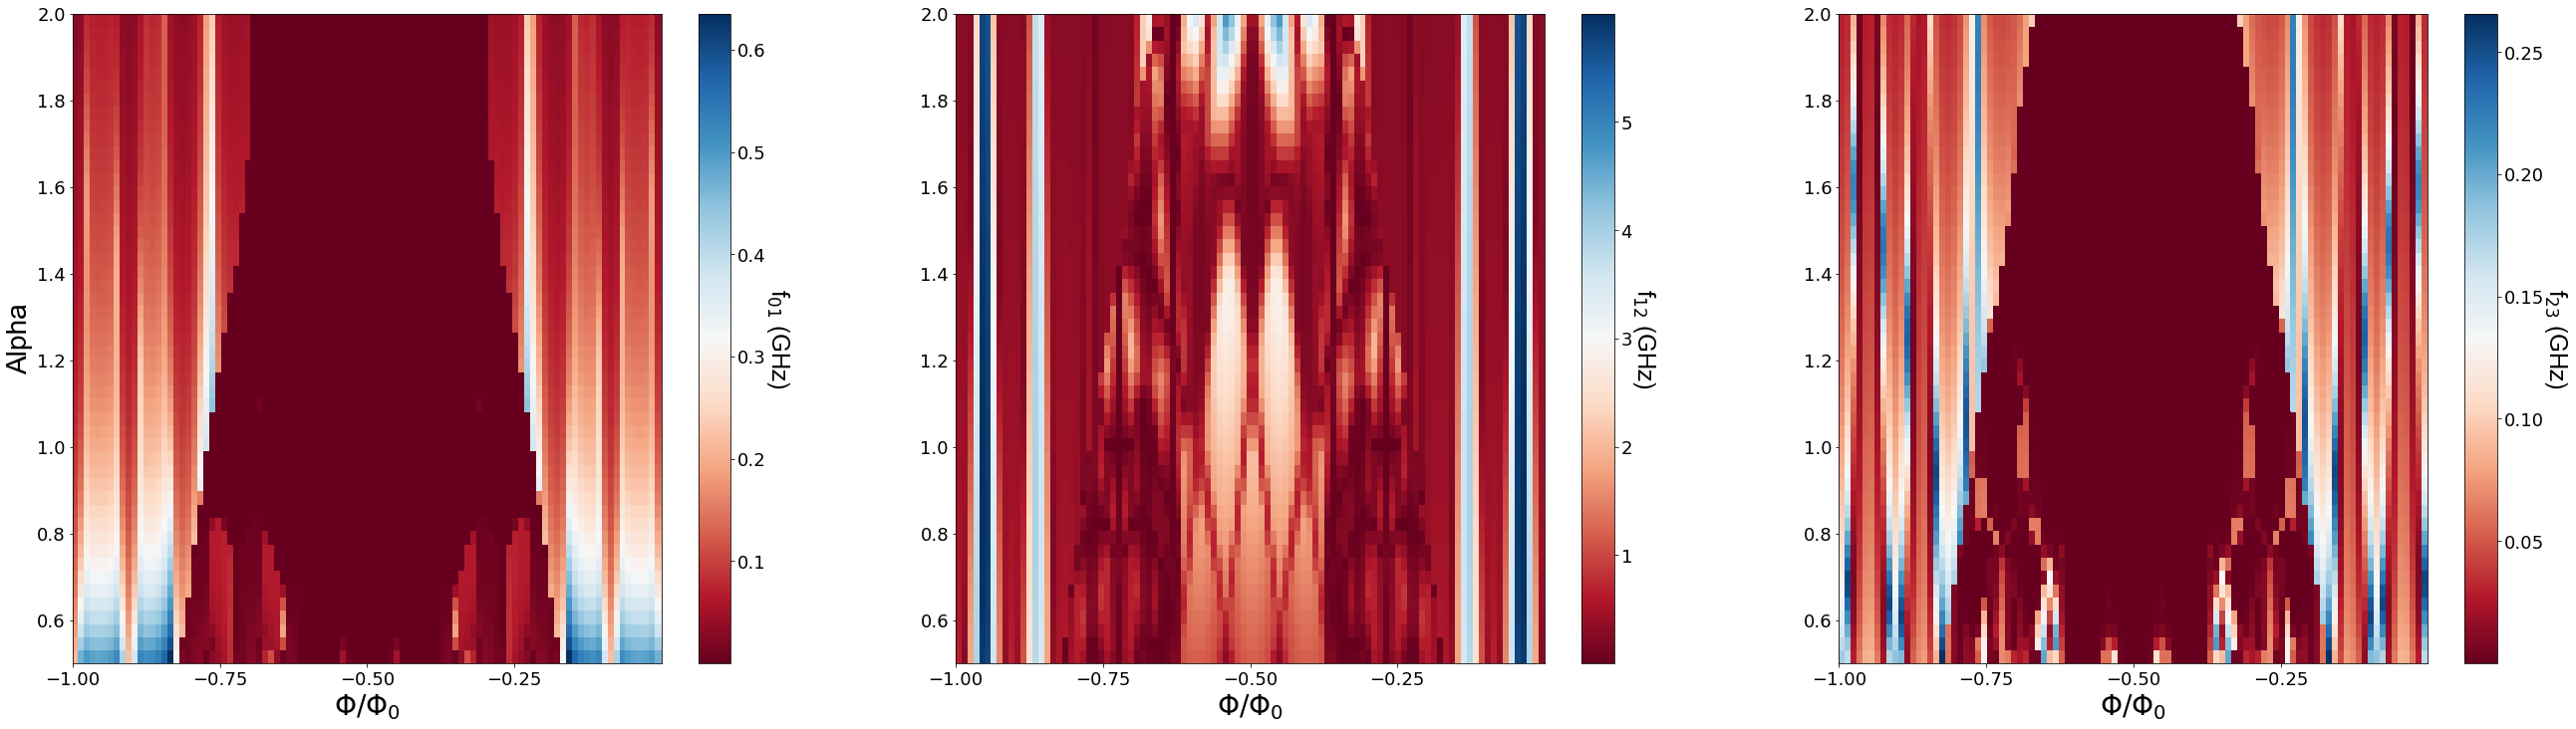

In [182]:
hfont = {'fontname':'Arial'}
fig, axes = plt.subplots(1, 3, figsize=(45, 12))

p = axes[0].pcolor(ygrid, xgrid, zgrid0/1e9, cmap=cm.RdBu)

axes[0].set_xlabel(r'$\Phi/\Phi_0$', fontsize=28, **hfont)
axes[0].set_ylabel(r'Alpha', fontsize=28, **hfont)
axes[0].tick_params(axis='x', labelsize=18)
axes[0].tick_params(axis='y', labelsize=18)
axes[0].set_xticks(arange(-1, 0, 0.25));
axes[0].axis('tight')

cb = fig.colorbar(p, ax=axes[0])
cb.set_label('f$_{01}$ (GHz)', labelpad=25, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18) 

p = axes[1].pcolor(ygrid, xgrid, zgrid1/1e9, cmap=cm.RdBu)

axes[1].set_xlabel(r'$\Phi/\Phi_0$', fontsize=28, **hfont)
#axes[0].set_ylabel(r'Alpha', fontsize=28, **hfont)
axes[1].tick_params(axis='x', labelsize=18)
axes[1].tick_params(axis='y', labelsize=18)
axes[1].set_xticks(arange(-1, 0, 0.25));
axes[1].axis('tight')

cb = fig.colorbar(p, ax=axes[1])
cb.set_label('f$_{12}$ (GHz)', labelpad=25, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18) 

p = axes[2].pcolor(ygrid, xgrid, zgrid2/1e9, cmap=cm.RdBu)

axes[2].set_xlabel(r'$\Phi/\Phi_0$', fontsize=28, **hfont)
#axes[0].set_ylabel(r'Alpha', fontsize=28, **hfont)
axes[2].tick_params(axis='x', labelsize=18)
axes[2].tick_params(axis='y', labelsize=18)
axes[2].set_xticks(arange(-1, 0, 0.25));
axes[2].axis('tight')

cb = fig.colorbar(p, ax=axes[2])
cb.set_label('f$_{23}$ (GHz)', labelpad=25, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18) 



plt.gcf().set_size_inches(45,12)
plt.savefig("C:/neon/4loops_qubit_alpha_variation_3freq_EJ=25GHz_Ec=300MHz_C = 20fF.pdf", bbox_inches="tight")

# Stability diagram

In [15]:
FQJJ = QCircuit()
FQJJ.add_element(QJosephsonJunction('JJA'), ['1', '3'])
FQJJ.add_element(QJosephsonJunction('JJB'), ['GND', '4'])
FQJJ.add_element(QJosephsonJunction('JJC'), ['2', '5'])
FQJJ.add_element(QJosephsonJunction('JJD'), ['3', '4'])
FQJJ.add_element(QJosephsonJunction('JJE'), ['4', '5'])
FQJJ.add_element(QJosephsonJunction('JJF'), ['3', '6'])
FQJJ.add_element(QJosephsonJunction('JJG'), ['4', '7'])
FQJJ.add_element(QJosephsonJunction('JJH'), ['5', '8'])

FQJJ.add_element(QCapacitance('CA'), ['1', '3'])
FQJJ.add_element(QCapacitance('CB'), ['GND', '4'])
FQJJ.add_element(QCapacitance('CC'), ['2', '5'])
FQJJ.add_element(QCapacitance('CD'), ['3', '4'])
FQJJ.add_element(QCapacitance('CE'), ['4', '5'])
FQJJ.add_element(QCapacitance('CF'), ['3', '6'])
FQJJ.add_element(QCapacitance('CG'), ['4', '7'])
FQJJ.add_element(QCapacitance('CH'), ['5', '8'])
        
phix = QVariable('φx')
phiy = QVariable('φy')
phiz = QVariable('φz')
phib = QVariable('φb')
phie1 = QVariable('φe1')
phie2 = QVariable('φe2')


phix.create_grid(7, 1)
phiy.create_grid(7, 1)
phiz.create_grid(7, 1)
phib.create_grid(7, 1)

FQJJ.add_variable(phix)
FQJJ.add_variable(phiy)
FQJJ.add_variable(phiz)
FQJJ.add_variable(phib)
FQJJ.add_variable(phie1)
FQJJ.add_variable(phie2)

FQJJ.map_nodes_linear(['GND', '1', '2', '3', '4', '5', '6', '7', '8'], 
                      ['φx', 'φy', 'φz', 'φb', 'φe1', 'φe2'], 
                      np.asarray([[0,0,0,0,0,0], [0,0,0,0,-1,0], [0,0,0,0,1,0], [0,0,1,0,-1,0], [1,0,0,0,0,0],
                                  [0,1,0,0,1,0], [1,0,0,1,0,1], [1,0,0,1,0,0],[1,0,0,1,0,-1]]))

alpha = 0.72
flux_steps = 100
energies = np.zeros((flux_steps,flux_steps,4), dtype=np.float)

Ej = 200e9
Ec = 2*1.9e-19**2/5e-15/(2*np.pi*1.054e-34)
FQJJ.find_element('JJA').set_critical_current(Ej)
FQJJ.find_element('JJF').set_critical_current(Ej)
FQJJ.find_element('JJC').set_critical_current(Ej)
FQJJ.find_element('JJH').set_critical_current(Ej)

FQJJ.find_element('CA').set_capacitance(2/Ec)
FQJJ.find_element('CF').set_capacitance(2/Ec)
FQJJ.find_element('CC').set_capacitance(2/Ec)
FQJJ.find_element('CH').set_capacitance(2/Ec)

FQJJ.find_element('JJB').set_critical_current(Ej*alpha)
FQJJ.find_element('CB').set_capacitance(2*alpha/Ec)

FQJJ.find_element('JJD').set_critical_current(Ej*alpha)
FQJJ.find_element('CD').set_capacitance(2*alpha/Ec)

FQJJ.find_element('JJE').set_critical_current(Ej*alpha)
FQJJ.find_element('CE').set_capacitance(2*alpha/Ec)

FQJJ.find_element('JJG').set_critical_current(Ej*alpha)
FQJJ.find_element('CG').set_capacitance(2*alpha/Ec)

phi_range1 = np.linspace(-2*np.pi, 2*np.pi, flux_steps)
phi_range2 = np.linspace(-2*np.pi, 2*np.pi, flux_steps)

for phie1_id, phie1_value in enumerate(phi_range1):
    for phie2_id, phie2_value in enumerate(phi_range2):
        phie1.set_parameter(phie1_value, 0)
        phie2.set_parameter(phie2_value, 0)
        FQJJ.calculate_potentials()
        [eigenenergies, eigenfunctions] = FQJJ.diagonalize_phase(num_states=4)
        energies[phie1_id, phie2_id, :] = eigenenergies
        print (phie1_id,phie2_id)


C:\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:82: ComplexWarning: Casting complex values to real discards the imaginary part


0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80
1 81
1 82
1 83
1 84
1 85
1 86
1 87
1 88
1 89
1 90
1 91
1 92
1 93
1 94
1 95
1 96
1 97
1 98
1 99
2 0
2 1
2 2
2 3
2 4


In [19]:
# Создаем двумерную матрицу-сетку
xgrid, ygrid = np.meshgrid(phi_range1/np.pi/2,phi_range2/np.pi/2)

# В узлах рассчитываем значение функции
zgrid0 = xgrid+ygrid

for i in arange (0, flux_steps-1, 1):
    for j in arange (0, flux_steps-1, 1):
        zgrid0[j][i]=energies[i,j,0]
        
x1=arange (-0.8, 0.8, 0.01)
x2=arange (-0.4, 0.4, 0.01)

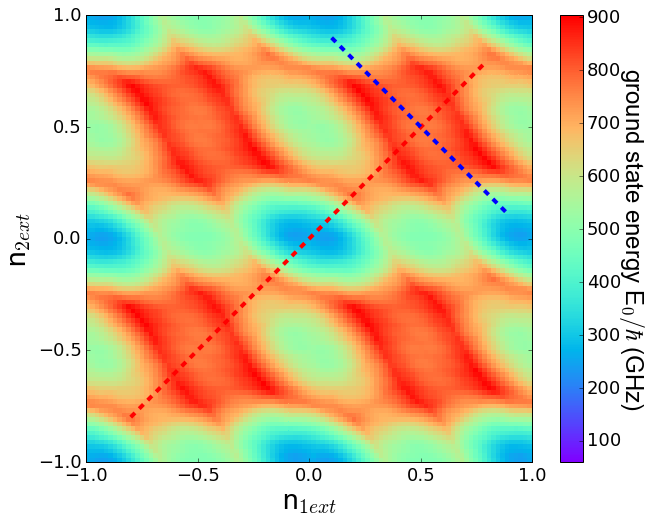

In [21]:
hfont = {'fontname':'Arial'}
fig, axes = plt.subplots(1, 1, figsize=(10, 8))

p = axes.pcolor(ygrid, xgrid, zgrid0/1e9, cmap=cm.rainbow,  vmin=60, vmax=zgrid0.max()/1e9)

axes.set_xlabel(r'n$_{1ext}$', fontsize=28, **hfont)
axes.set_ylabel(r'n$_{2ext}$', fontsize=28, **hfont)
axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)
axes.set_xticks(arange(-1, 1.1, 0.5));
axes.axis('tight')

#axes.text(-0.15, -0,r'(0,0)', color ='w', fontsize=24, verticalalignment='center')
#axes.text(-0.15, -0.85,r'(0,-1)', color ='w', fontsize=24, verticalalignment='center')
#axes.text(-0.15, 0.85,r'(0,1)', color ='w', fontsize=24, verticalalignment='center')

#axes.text(0.70, -0,r'(1,0)', color ='w', fontsize=24, verticalalignment='center')
#axes.text(0.70, -0.85,r'(1,-1)', color ='w', fontsize=24, verticalalignment='center')
#axes.text(0.70, 0.85,r'(1,1)', color ='w', fontsize=24, verticalalignment='center')

#axes.text(-0.95, -0,r'(-1,0)', color ='w', fontsize=24, verticalalignment='center')
#axes.text(-0.95, -0.85,r'(-1,-1)', color ='w', fontsize=24, verticalalignment='center')
#axes.text(-0.95, 0.85,r'(-1,1)', color ='w', fontsize=24, verticalalignment='center')

axes.plot(x1,x1, '--r' , linewidth=4.0)
axes.plot(x2+0.5,-x2+0.5, '--b' , linewidth=4.0)

#plt.plot([0, 0.33, 0.5], [0, 0.33, 0.5], 'bs', linewidth=10.0)

cb = fig.colorbar(p, ax=axes)
cb.set_label('ground state energy E$_{0}/\hbar$ (GHz)', labelpad=25, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18) 

plt.gcf().set_size_inches(10,8)
plt.savefig("C:/neon/4loops qubit.pdf", bbox_inches="tight")

# 4 loops qubit with 12 JJ

In [87]:
FQJJ = QCircuit()
FQJJ.add_element(QJosephsonJunction('JJA'), ['1', '2'])
FQJJ.add_element(QJosephsonJunction('JJB'), ['3', '4'])
FQJJ.add_element(QJosephsonJunction('JJC'), ['1', '5'])
FQJJ.add_element(QJosephsonJunction('JJD'), ['GND', '6'])
FQJJ.add_element(QJosephsonJunction('JJE'), ['4', '7'])
FQJJ.add_element(QJosephsonJunction('JJF'), ['5', '6'])
FQJJ.add_element(QJosephsonJunction('JJG'), ['6', '7'])
FQJJ.add_element(QJosephsonJunction('JJH'), ['5', '8'])
FQJJ.add_element(QJosephsonJunction('JJI'), ['6', '10'])
FQJJ.add_element(QJosephsonJunction('JJK'), ['7', '12'])
FQJJ.add_element(QJosephsonJunction('JJL'), ['8', '9'])
FQJJ.add_element(QJosephsonJunction('JJM'), ['11', '12'])

FQJJ.add_element(QCapacitance('CA'), ['1', '2'])
FQJJ.add_element(QCapacitance('CB'), ['3', '4'])
FQJJ.add_element(QCapacitance('CC'), ['1', '5'])
FQJJ.add_element(QCapacitance('CD'), ['GND', '6'])
FQJJ.add_element(QCapacitance('CE'), ['4', '7'])
FQJJ.add_element(QCapacitance('CF'), ['5', '6'])
FQJJ.add_element(QCapacitance('CG'), ['6', '7'])
FQJJ.add_element(QCapacitance('CH'), ['5', '8'])
FQJJ.add_element(QCapacitance('CI'), ['6', '10'])
FQJJ.add_element(QCapacitance('CK'), ['7', '12'])
FQJJ.add_element(QCapacitance('CL'), ['8', '9'])
FQJJ.add_element(QCapacitance('CM'), ['11', '12'])

#FQJJ.add_element(QCapacitance('CBig'), ['5', '7'])
        
phix = QVariable('φx')
phiy = QVariable('φy')
phiz = QVariable('φz')
phib = QVariable('φb')
phi1 = QVariable('φ1')
phi2 = QVariable('φ2')
phi3 = QVariable('φ3')
phi4 = QVariable('φ4')
phie = QVariable('φe')


phix.create_grid(5, 1)
phiy.create_grid(5, 1)
phiz.create_grid(5, 1)
phib.create_grid(5, 1)
phi1.create_grid(5, 1)
phi2.create_grid(5, 1)
phi3.create_grid(5, 1)
phi4.create_grid(5, 1)

FQJJ.add_variable(phix)
FQJJ.add_variable(phiy)
FQJJ.add_variable(phiz)
FQJJ.add_variable(phib)
FQJJ.add_variable(phi1)
FQJJ.add_variable(phi2)
FQJJ.add_variable(phi3)
FQJJ.add_variable(phi4)
FQJJ.add_variable(phie)

FQJJ.map_nodes_linear(['GND', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], 
                      ['φx', 'φy', 'φz', 'φb', 'φ1', 'φ2', 'φ3', 'φ4', 'φe'], 
                      np.asarray([[0,0,0,0,0,0,0,0, 0], 
                                  [0,0,0,0,1,0,0,0,-1], 
                                  [0,0,0,0,0,0,0,0,-1], 
                                  [0,0,0,0,0,0,0,0, 1],
                                  [0,0,0,0,0,1,0,0, 1], 
                                  [0,0,1,0,1,0,0,0,-1], 
                                  [1,0,0,0,0,0,0,0, 0],
                                  [0,1,0,0,0,1,0,0, 1],
                                  [1,0,0,1,0,0,1,0, 1],
                                  [1,0,0,1,0,0,0,0, 1], 
                                  [1,0,0,1,0,0,0,0, 0],
                                  [1,0,0,1,0,0,0,0,-1],
                                  [1,0,0,1,0,0,0,1,-1]]))

alpha = 1
flux_steps = 50
energies = np.zeros((flux_steps,4), dtype=np.float)

Ej = 10e9                 # Ghz
Ec = 300e6                  # Ghz

C_big = 60e-15
E_Big = constants.elementary_charge**2/C_big/2/constants.Planck  

FQJJ.find_element('JJA').set_critical_current(Ej)
FQJJ.find_element('JJB').set_critical_current(Ej)
FQJJ.find_element('JJC').set_critical_current(Ej)
FQJJ.find_element('JJE').set_critical_current(Ej)
FQJJ.find_element('JJH').set_critical_current(Ej)
FQJJ.find_element('JJL').set_critical_current(Ej)
FQJJ.find_element('JJM').set_critical_current(Ej)
FQJJ.find_element('JJK').set_critical_current(Ej)

FQJJ.find_element('CA').set_capacitance(2/Ec)
FQJJ.find_element('CF').set_capacitance(2/Ec)
FQJJ.find_element('CC').set_capacitance(2/Ec)
FQJJ.find_element('CH').set_capacitance(2/Ec)
FQJJ.find_element('CH').set_capacitance(2/Ec)
FQJJ.find_element('CL').set_capacitance(2/Ec)
FQJJ.find_element('CM').set_capacitance(2/Ec)
FQJJ.find_element('CK').set_capacitance(2/Ec)

FQJJ.find_element('JJD').set_critical_current(Ej*alpha)
FQJJ.find_element('CD').set_capacitance(2*alpha/Ec)

FQJJ.find_element('JJF').set_critical_current(Ej*alpha)
FQJJ.find_element('CF').set_capacitance(2*alpha/Ec)

FQJJ.find_element('JJG').set_critical_current(Ej*alpha)
FQJJ.find_element('CG').set_capacitance(2*alpha/Ec)

FQJJ.find_element('JJI').set_critical_current(Ej*alpha)
FQJJ.find_element('CI').set_capacitance(2*alpha/Ec)

#FQJJ.find_element('CBig').set_capacitance(2/E_Big)



phi_range = np.linspace(-2*np.pi, 0*np.pi, flux_steps)
for phie_id, phie_value in enumerate(phi_range):
    phie.set_parameter(phie_value, 0)
    FQJJ.calculate_potentials()
    [eigenenergies, eigenfunctions] = FQJJ.diagonalize_phase(num_states=4)
    energies[phie_id, :] = eigenenergies
    print (phie_id)
    #print('φx1_id: {0}, φx2_id: {1}, gap: {2}'.format(phix1_id, phix2_id, eigenenergies[1]-eigenenergies[0]))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:125: ComplexWarning: Casting complex values to real discards the imaginary part


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


ArpackNoConvergence: ARPACK error -1: No convergence (1001 iterations, 3/4 eigenvectors converged)

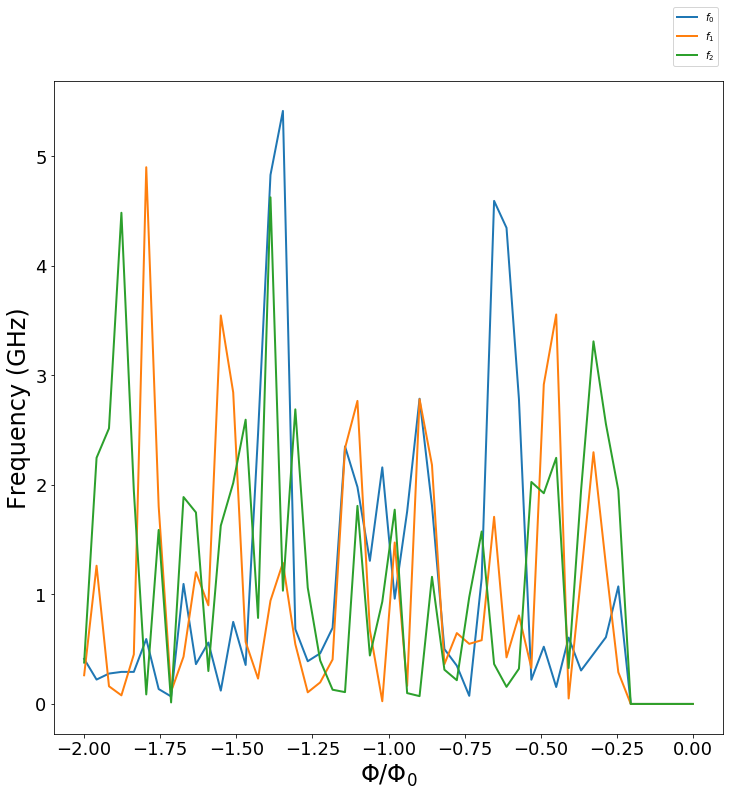

In [88]:
fig, axes = plt.subplots(figsize=(12, 12))

handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, labels)

for n in range(3):
    plt.plot(np.linspace(-2, 0, flux_steps), (energies[:,n+1] - energies[:,n])/1e9, linewidth=2.0,  label=r'$f_{%d}$'%n)
    
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102))

axes.set_xlabel(r'$\Phi/\Phi_0$', fontsize=24)
axes.set_ylabel(r'Frequency (GHz)', fontsize=24)

axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)